***
# The Spark Foundation - Task 1
***
### Author : Nitish Kumar K V
## Prediction using Supervised ML
Predicting the percentage of an student based on the number of study hours using simple Liner Regression.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline

In [2]:
# Reading data from remote link

url = "http://bit.ly/w-data"

data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [5]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

`The Dataset has no null values.`
***

***
### **Data Visualization**

Text(0.5, 1.0, 'Hours v/s Scores')

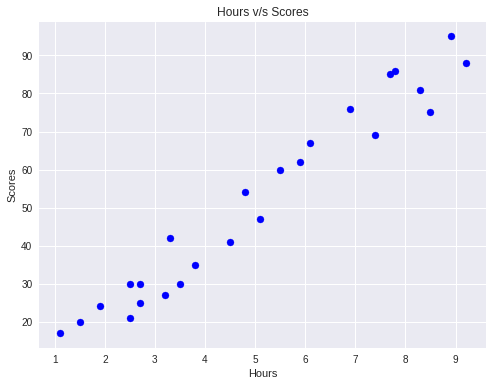

In [6]:
hours = data.Hours
scores = data.Scores

plt.figure(figsize=[8,6])
plt.scatter(hours, scores, color="b")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours v/s Scores")


We can see from the plot that there is a clear linear relation between number of study hours and percentage scored. So linear regression would be a good model for prediction. 
***

***
### **Preparing the data**

In [7]:
X = data.Hours.values.reshape([25,1])
y = data.Scores.values.reshape([25,1])

In [8]:
# Splitting the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=3)

print("Training size = ", X_train.shape[0])
print("Test size = ", X_test.shape[0])

Training size =  17
Test size =  8


***
### **Training the Linear Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

print("coefficient: %.2f" % model.coef_[0,0])
print("intercept: %.2f" % model.intercept_[0])

coefficient: 9.58
intercept: 2.44


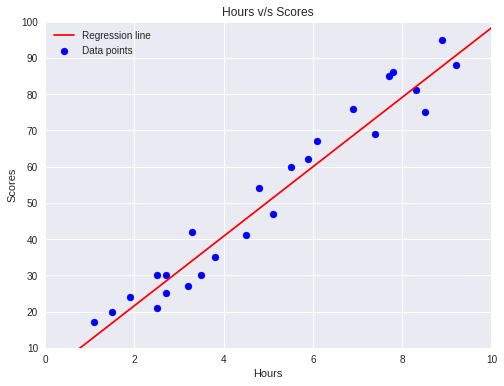

In [10]:
# Plotting the regression line

plt.figure(figsize=[8,6])

plt.scatter(X, y, color="b", label="Data points")

x_line = np.array([0,10])
y_line = model.coef_[0,0]*x_line + model.intercept_[0]
plt.plot(x_line, y_line, color="r", label="Regression line")

plt.xlim([0,10])
plt.ylim([10,100])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours v/s Scores")
plt.legend(loc="upper left")

***
### **Making Predictions**

In [11]:
# Predicting the scores for test-dataset(in Hours)

y_pred = model.predict(X_test)

df_pred = pd.DataFrame({"Hours":X_test[:,0], "Predicted_Score":y_pred[:,0]})
df_pred

,Hours,Predicted_Score
0,6.1,60.910546
1,1.9,20.654943
2,4.5,45.575078
3,6.9,68.578280
4,8.9,87.747615
5,2.5,26.405743
6,3.3,34.073477
7,3.2,33.115010


In [12]:
# Comparing actual and predicted scores

df_compare = pd.DataFrame({"Actual_Score": y_test[:,0], "Predicted_Score":y_pred[:,0]})
df_compare

,Actual_Score,Predicted_Score
0,67,60.910546
1,24,20.654943
2,41,45.575078
3,76,68.578280
4,95,87.747615
5,30,26.405743
6,42,34.073477
7,27,33.115010


In [13]:
# Predicting the score for a student who studies 9.5 hours a day

hours = 9.25
predicted_score = model.predict(np.array([[hours]]))

print("Hours:", hours)
print("Predicted_Score: %0.2f" % (predicted_score))

Hours: 9.25
Predicted_Score: 91.10


***
### **Model Evaluation**

In [14]:
from sklearn import metrics

R_Score = model.score(X_test, y_test)
MAE = metrics.mean_absolute_error(y_test, y_pred)

print("R_Score: %0.4f" % R_Score)
print("Mean Absolute Error: %0.2f" % MAE)

R_Score: 0.9388
Mean Absolute Error: 5.79


***
### **Calculating Error on Prediction**

**$Error Matrix = (MSE*(X^{T}X)^{-1})^{1/2}$**

In [15]:
x = np.c_[np.ones(17), X_train]
err_matrix = np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))*(17/15) * np.linalg.pinv( np.matmul(x.T, x) ))
print("Error_intercept: %.2f" % err_matrix[0,0])
print("Error_slope: %.2f " % err_matrix[1,1])

Error_intercept: 3.05
Error_slope: 0.53 


<ipython-input-15-e7f71302fd05>:2: RuntimeWarning: invalid value encountered in sqrt
  err_matrix = np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))*(17/15) * np.linalg.pinv( np.matmul(x.T, x) ))



$ Intercept = 2.44 ^{+}_{-} 3.05  $
 
$ Slope = 9.58  ^{+}_{-} 0.53$

$ Error Pred = x * 0.53 + 3.05 $



In [16]:
Error_pred = 9.25*.53 + 3.05
Error_pred

7.9525

**` Predicted Score = 91.10 +/- 7.95`**